# Introducción

Como Data Analyst, el trabajo consiste en recopilar y limpiar grandes conjuntos de datos para garantizar su exactitud y análisis. Utilizando herramientas y técnicas estadísticas para identificar patrones y tendencias entre los datos para la toma de decisiones.

Esto implica diferentes etapas, como analizar la información general, procesar los datos, priorizar las hipótesis, analizar los test A/B y obtener conclusiones generales con base a los resultados.

La finalidad de este proyecto, es estudiar los informes proporcionado por el departemento de marketing, recopilar la lista de hipótesis que puedan ayudar a aumentar los ingresos de la "Gran Tienda Online" y lanzar un test A/B para analizar los resultados que se obtendran durante el desarrollo de la misma.

# Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import plotly.express as px
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns 
import scipy.stats as stats
from scipy import stats as st
from scipy.stats import ttest_ind

# Descripción de los datos

In [2]:
# Carga de archivo de datos en el DataFrames
df_hypo = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
df_orders = pd.read_csv('/datasets/orders_us.csv', sep=',')
df_visits = pd.read_csv('/datasets/visits_us.csv', sep=',')

# hypotheses DataFrame

In [3]:
#Imprime la información general/resumida sobre el DataFrame hypotheses
df_hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
#Imprime una muestra de los datos para hypotheses
df_hypo.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [5]:
# Imprime la descripción general/resumen estadístico sobre el DataFrame hypotheses
df_hypo.describe()

,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [6]:
#Bucle para reemplazo de los nombres de las columnas en minúsculas.

new_col_names = []

for old_name in df_hypo.columns:
    # Luego, pon todas las letras en minúsculas
    name_lowered = old_name.lower()
    # Agrega el nuevo nombre a la lista de nuevos nombres de columna
    new_col_names.append(name_lowered)

# Reemplaza los nombres anteriores por los nuevos
df_hypo.columns = new_col_names

print(df_hypo.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')


In [7]:
# Revisar si hay hypotheses duplicados
print(df_hypo.duplicated().sum()) 

0


# orders DataFrame

In [8]:
#Imprime la información general/resumida sobre el DataFrame orders
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [9]:
#Imprime una muestra de los datos para orders
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [10]:
# Imprime la descripción general/resumen estadístico sobre el DataFrame orders
df_orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [11]:
# Cambiar el nombre del encabezado "visitorId"

new_col_names = []

for old_name in df_orders.columns:
    # Luego, pon todas las letras en minúsculas
    name_lowered = old_name.lower()
    # Agrega el nuevo nombre a la lista de nuevos nombres de columna
    new_col_names.append(name_lowered)

# Reemplaza los nombres anteriores por los nuevos

df_orders.columns = new_col_names

print(df_orders.columns)

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')


In [12]:
#Tranformar date object a datetime
df_orders['date'] = df_orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [13]:
# Revisar si hay orders duplicados
print(df_orders.duplicated().sum()) 

0


# visits DataFrame

In [14]:
#Imprime la información general/resumida sobre el DataFrame visits
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
#Imprime una muestra de los datos para visits
df_visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
# Imprime la descripción general/resumen estadístico sobre el DataFrame visits
df_visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [17]:
df_visits['date'] = df_visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [18]:
# Revisar si hay visits duplicados
print(df_visits.duplicated().sum()) 

0


Para el desarrollo de este proyecto se importaron tres datasets, se puedeo observar que los datos se encuentran en orden, excepto los dataframes de visits y orders, sus columnas 'date', estaba en formato object y se transformo a formato datetime. De igual manera para los datasets hypothesis y orders sus columnas fueron convertidos a minusculas con la finalidad de enriquecer mas los datos y sean mas entendible. Por último, se reviso si habían valores duplicados y al final no se encontraron datos duplicados.

# Parte 1. Priorizar hipótesis

• Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [19]:
#Framework ICE
df_hypo['ICE'] = (df_hypo['impact']*df_hypo['confidence'])/df_hypo['effort']
print(df_hypo[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


Con base a los datos obtenidos, se puede osbservar que el framework ICE presenta la 8, 0 y 7 como las hipótesis más comprometedoras.

•	Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [20]:
df_hypo['RICE'] = (df_hypo['reach']*df_hypo['impact']*df_hypo['confidence'])/df_hypo['effort']
print(df_hypo[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


Con base a los datos obtenidos, se puede osbservar que el framework RICE, nuevamente presenta la 7, 2 y 0 como las hipótesis más comprometedoras.Las hipótesis 7 y 0 vuelven a estar en el top 3 junto con la 6 y 2, esto se debe a que su puntaje de reach es mayor que al de las otras hipótesis.

•	Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

In [21]:
df_hypo[['hypothesis','ICE', 'RICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE,RICE
8,Launch a promotion that gives users discounts ...,16.200000,16.2
0,Add two new channels for attracting traffic. T...,13.333333,40.0
7,Add a subscription form to all the main pages....,11.200000,112.0
6,Show banners with current offers and sales on ...,8.000000,40.0
2,Add product recommendation blocks to the store...,7.000000,56.0
1,Launch your own delivery service. This will sh...,2.000000,4.0
5,Add a customer review page. This will increase...,1.333333,4.0
3,Change the category structure. This will incre...,1.125000,9.0
4,Change the background color on the main page. ...,1.000000,3.0


Como podemos ver, entre las 3 primeras prioridades para ambos métodos obtuvieron las hipótesis 0 y 7, pero si para el método ICE la octava hipótesis apareció en el primer lugar, para el método RICE solo obtuvo el quinto lugar, debido a la baja relación de las otras hipótesis con respecto al número de usuarios afectados.

# Parte 2. Análisis de test A/B

Analiza el test A/B:

1.	Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

In [22]:
#Se crea un dates_groups para crear una matriz con valores únicos 
dates_groups = df_orders[['date','group']].drop_duplicates()

In [23]:
#Se crea un orders_aggregated para visualizar los datos en una tabla 
orders_aggregated = dates_groups \
.apply(lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])] \
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1) \
.sort_values(by=['date','group'])

orders_aggregated.head()

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5


In [24]:
#Se crea un visits_aggregated para visualizar los datos en una tabla 
visits_aggregated = dates_groups \
.apply(lambda x: df_visits[np.logical_and(df_visits['date'] <= x['date'], df_visits['group'] == x['group'])] \
.agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1) \
.sort_values(by=['date','group']) 

visits_aggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


2.	Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

In [25]:
#Ahora se fusionara estas dos tablas con función merge
cumulative_data = orders_aggregated.merge(visits_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


3.	Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

In [26]:
#Ingresos acumulados A
cumulative_revenue_A = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders', 'visitors']]
cumulative_revenue_A.head()

,date,revenue,orders,visitors
0,2019-08-01,2356.8,24,719
2,2019-08-02,3860.3,44,1338
4,2019-08-03,5675.5,68,1845
6,2019-08-04,6822.1,84,2562
8,2019-08-05,8810.2,109,3318


In [27]:
#Ingresos acumulados B
cumulative_revenue_B = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders', 'visitors']]
cumulative_revenue_B.head()

,date,revenue,orders,visitors
1,2019-08-01,1620.0,21,713
3,2019-08-02,4243.8,45,1294
5,2019-08-03,6050.6,61,1803
7,2019-08-04,7767.9,78,2573
9,2019-08-05,9262.9,101,3280


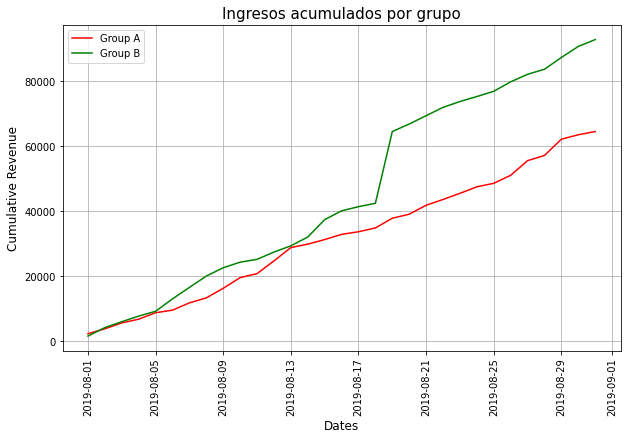

In [28]:
#Gráfica de ingresos acumulados por grupo
cumulative_revenue_A = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]
cumulative_revenue_B = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(10,6)) 
plt.xticks(rotation=90) 
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='Group A', color='red'); 
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='Group B', color='green');
plt.title('Ingresos acumulados por grupo',fontdict={'size':15})
plt.xlabel('Dates',fontdict={'size':12})
plt.ylabel('Cumulative Revenue',fontdict={'size':12})
plt.grid(True)

plt.legend();

Según se puede apreciar en la gráfica, los ingresos aumentan de manera constante durante toda la prueba, ambos grupos tienen una dinámica similar. Pero el grupo B muestra un pico después del 17 de agosto de 2019 y los ingresos en el grupo B aumentan más que en el grupo A.

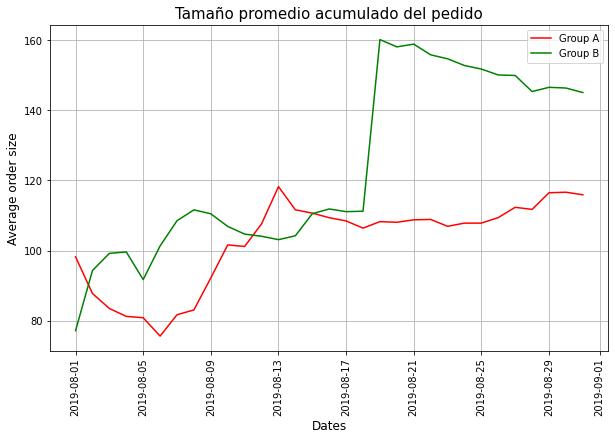

In [29]:
#Gráfica de tamaño promedio acumulado del pedido
plt.figure(figsize=(10,6))
plt.xticks(rotation=90) 
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='Group A', color='red')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='Group B', color='green')

plt.title('Tamaño promedio acumulado del pedido',fontdict={'size':15})
plt.xlabel('Dates',fontdict={'size':12})
plt.ylabel('Average order size',fontdict={'size':12})
plt.grid(True)

plt.legend();

Con base a la gráfica, se concluye que el tamaño promedio de los pedidos está aumentando en ambos grupos, el grupo B tuvo un pico el 17 de agosto de 2019 y después la tendencia tiende a caer.

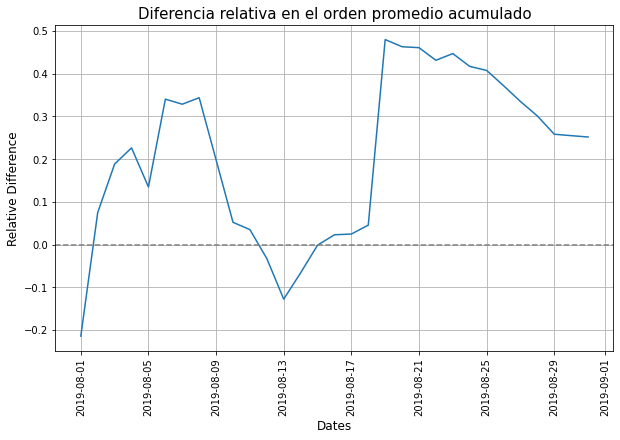

In [30]:
#Gráfica de diferencia relativa en el orden promedio acumulado
merged_cumulativerevenue = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,6))
plt.xticks(rotation=90) 

plt.plot(merged_cumulativerevenue['date'], (merged_cumulativerevenue['revenueB']/merged_cumulativerevenue['ordersB'])/(merged_cumulativerevenue['revenueA']/merged_cumulativerevenue['ordersA'])-1)

plt.title('Diferencia relativa en el orden promedio acumulado',fontdict={'size':15})
plt.xlabel('Dates',fontdict={'size':12})
plt.ylabel('Relative Difference',fontdict={'size':12})
plt.grid(True)

plt.axhline(y=0, color='gray', linestyle='--');

Según se observa en la gráfica, la tendencia tiene altibajos. La razón de esto podrían ser algunos pedidos grandes o valores atípicos.

4.	Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

In [31]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,2356.8,719,0.033380
1,2019-08-01,B,21,20,1620.0,713,0.029453
2,2019-08-02,A,44,38,3860.3,1338,0.032885
3,2019-08-02,B,45,43,4243.8,1294,0.034776
4,2019-08-03,A,68,62,5675.5,1845,0.036856


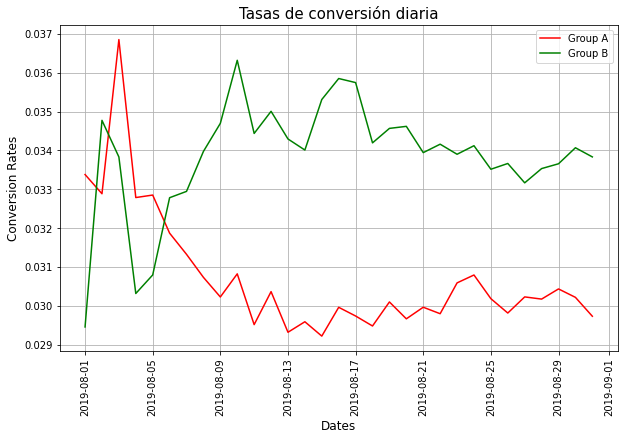

In [32]:

cumulative_data_A = cumulative_data[cumulative_data['group']=='A']
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

plt.figure(figsize=(10,6))
plt.xticks(rotation=90) 
plt.title('Tasas de conversión diaria',fontdict={'size':15})
plt.xlabel('Dates',fontdict={'size':12})
plt.ylabel('Conversion Rates',fontdict={'size':12})
plt.grid(True)

plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='Group A', color='red')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='Group B', color='green')
plt.legend();

In [33]:
merged_cumulative_conversion = cumulative_data_A[['date','conversion']] \
.merge(cumulative_data_B[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

merged_cumulative_conversion.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


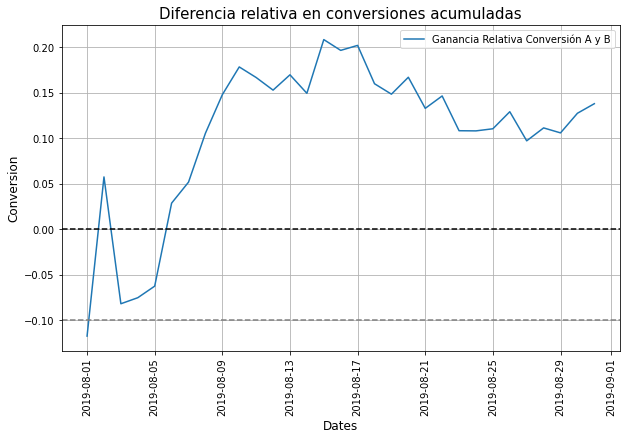

In [34]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90) 
plt.plot(merged_cumulative_conversion['date'], merged_cumulative_conversion['conversionB']/
         merged_cumulative_conversion['conversionA']-1, label='Ganancia Relativa Conversión A y B')

plt.legend()

plt.title('Diferencia relativa en conversiones acumuladas',fontdict={'size':15})
plt.xlabel('Dates',fontdict={'size':12})
plt.ylabel('Conversion',fontdict={'size':12})
plt.grid(True)

plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=-0.1, color='grey', linestyle='--');

Al principio, tanto los grupos A como B eran volátiles, pero al final la tendencia del grupo A comenzó a disminuir, alcanzando el 25% y la tendencia del grupo B se estabilizó en torno al 28% de la tasa de conversión.

5.	Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

In [35]:
#Número de pedidos por usuario
orders_by_users = (df_orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid': pd.Series.nunique}))
orders_by_users.columns = ['visitorid', 'orders']
orders_by_users.sort_values(by='orders', ascending=False).head(10)



,visitorid,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


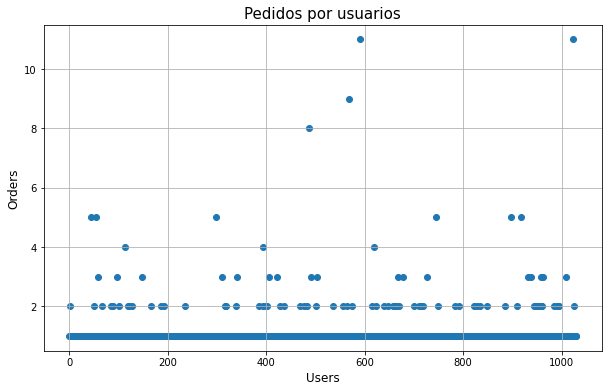

In [36]:
values = pd.Series(range(0,len(orders_by_users)))
plt.figure(figsize=(10,6))
plt.title('Pedidos por usuarios',fontdict={'size':15})
plt.xlabel('Users',fontdict={'size':12})
plt.ylabel('Orders',fontdict={'size':12})
plt.grid(True)
plt.scatter(values,orders_by_users['orders']);

Según los datos que arroja la gráfica, se puede osbervar que la mayoría de los usuarios realizaron 1 pedido. El grupo más pequeño realizó 2 pedidos y muy pocos usuarios realizaron 3 pedidos.

6.	Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [37]:
print(np.percentile(orders_by_users['orders'], [90, 95, 99]))

[1. 2. 4.]


No más del 5% realizaron 2 pedidos, y no más del 1% realizaron 4 pedidos. Por lo tanto, los usuarios que realizaron más de 4 pedidos son considerados valores anómalos.

7.	Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

In [38]:
df_orders.sort_values(by='revenue',ascending=False).head(10)

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B
1196,3936777065,2108080724,2019-08-15,3120.1,B
858,192721366,1316129916,2019-08-27,1450.2,A
1136,666610489,1307669133,2019-08-13,1425.8,A
744,3668308183,888512513,2019-08-27,1335.6,B
662,1811671147,4266935830,2019-08-29,1220.2,A
682,1216533772,4266935830,2019-08-29,1220.2,B
743,3603576309,4133034833,2019-08-09,1050.0,A
1103,1348774318,1164614297,2019-08-12,1025.8,A
1099,316924019,148427295,2019-08-12,1015.9,A


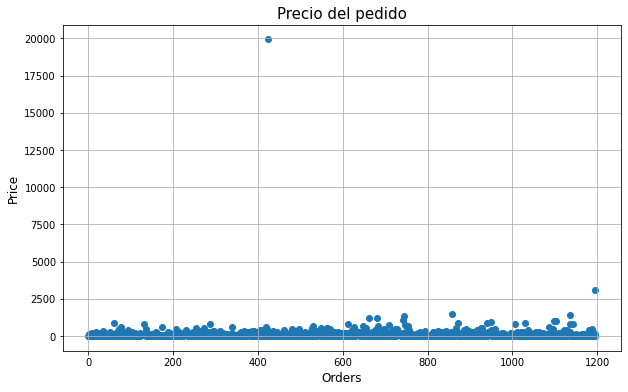

In [39]:
values = pd.Series(range(0,len(df_orders['revenue'])))
plt.figure(figsize=(10,6))
plt.title('Precio del pedido',fontdict={'size':15})
plt.xlabel('Orders',fontdict={'size':12})
plt.ylabel('Price',fontdict={'size':12})
plt.grid(True)
plt.scatter(values,df_orders['revenue']);

El diagrama de dispersión muestra que la mayoría de los pedidos son inferiores a 900 USD. En valores atípicos tenemos 1 pedido menor de 2000 USD y 1 de alrededor de 2500 USD.

8.	Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [40]:
print(np.percentile(df_orders['revenue'], [90, 95, 99]))

[282.48  435.54  900.904]


No más del 5% de los pedidos cuestan 436, y no más del 1% cuestan 901. Por lo tanto, los pedidos que cuestan más de 900 pueden ser considerados atípicos.

9.	Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [41]:
orders_by_usersA = df_orders[df_orders['group'] == 'A'].groupby('visitorid', as_index=False).agg({'transactionid': pd.Series.nunique})
orders_by_usersA.columns = ['visitorid', 'orders']
orders_by_usersB = df_orders[df_orders['group'] == 'B'].groupby('visitorid', as_index=False).agg({'transactionid': pd.Series.nunique})
orders_by_usersB.columns = ['visitorid', 'orders']
print(orders_by_usersA.head())
print()
print(orders_by_usersB.head())

   visitorid  orders
0    8300375       1
1   11685486       1
2   54447517       1
3   66685450       1
4   78758296       1

   visitorid  orders
0    5114589       1
1    6958315       1
2    8300375       1
3   39475350       1
4   47206413       1


In [42]:
sampleA = pd.concat([orders_by_usersA['orders'], pd.Series(0,index=np.arange(df_visits[df_visits['group'] == 'A']['visits'].sum() - len(orders_by_usersA['orders'])), name='orders')], axis=0)
sampleB = pd.concat([orders_by_usersB['orders'], pd.Series(0,index=np.arange(df_visits[df_visits['group'] == 'B']['visits'].sum() - len(orders_by_usersB['orders'])), name='orders')], axis=0)
print('{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


El valor p es menor a 0.05, entonces se rechaza la hipótesis nula, es decir, el análisis de datos en bruto mostró que si hay diferencias significativas en las tasas de conversión de ambos grupos, además el grupo B posee una ganancia de conversión relativa significativa en comparación al grupo A de un 13.8%

10.	Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [43]:
print('{0:.3f}'.format(stats.mannwhitneyu(df_orders[df_orders['group'] == 'A']['revenue'], df_orders[df_orders['group'] == 'B']['revenue'],)[1]))
print('{0:.3f}'.format(df_orders[df_orders['group'] == 'B']['revenue'].mean() / df_orders[df_orders['group'] == 'A']['revenue'].mean() - 1))


0.692
0.252


El valor p es superior a 0.05, por lo tanto, no existen diferencias estadísticamente significativas entre los tamaños de pedidos promedio de los grupos. Además, la diferencia relativa es de 25.2%.

11.	Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [44]:
userwithmanyorders = pd.concat([orders_by_usersA[orders_by_usersA['orders'] > 2]['visitorid'],orders_by_usersB[orders_by_usersB['orders'] > 2]['visitorid'],],axis=0)
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 1000]['visitorid']
abnormalUsers = (pd.concat([userwithmanyorders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())
print(abnormalUsers.head())
print()
print(abnormalUsers.shape)

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
Name: visitorid, dtype: int64

(29,)


Al finalizar los calculos se logragron obtener 29 usuarios anómalos en total.


12.	Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [45]:
sampleAfiltered = pd.concat([orders_by_usersA[np.logical_not(orders_by_usersA['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(df_visits[df_visits['group'] == 'A']['visits'].sum() - len(orders_by_usersA['orders'])),name='orders')],axis=0)
sampleBfiltered = pd.concat([orders_by_usersB[np.logical_not(orders_by_usersB['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(df_visits[df_visits['group'] == 'B']['visits'].sum() - len(orders_by_usersB['orders'])),name='orders')],axis=0)
sampleBfiltered

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18896, dtype: int64

In [46]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleAfiltered, sampleBfiltered)[1]))

print("{0:.3f}".format(sampleBfiltered.mean() / sampleAfiltered.mean() - 1))

0.01015
0.174


Se puede decir que se ha alcanzado el nivel de significación, y el segmento B sigue siendo mejor que el de A.

13.	Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.



In [47]:
# H0= No hay una diferencia significativa en el tamaño promedio de los pedidos entre los grupos que utilizan los datos filtrados
# H1= Existe una diferencia significativa en el tamaño promedio de los pedidos entre los grupos que utilizan los datos filtrados

print("{0:.3f}".format(stats.mannwhitneyu(df_orders[np.logical_and(df_orders['group'] == 'A',np.logical_not(df_orders['visitorid'].isin(abnormalUsers)),)]['revenue'],df_orders[np.logical_and(df_orders['group'] == 'B',np.logical_not(df_orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(df_orders[np.logical_and(df_orders['group'] == 'B',np.logical_not(df_orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() / df_orders[np.logical_and(df_orders['group'] == 'A',np.logical_not(df_orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()- 1))

0.838
-0.022


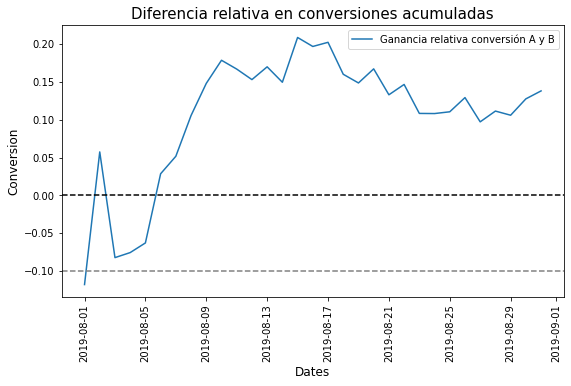

In [48]:
merged_cumulative_conversion= cumulative_data_A[['date','conversion']].merge(cumulative_data_B[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize= (9,5))
plt.xticks(rotation= 90) 
plt.plot(merged_cumulative_conversion['date'], merged_cumulative_conversion['conversionB']/merged_cumulative_conversion['conversionA']-1, label='Ganancia relativa conversión A y B')
plt.legend()

plt.title('Diferencia relativa en conversiones acumuladas',fontdict={'size':15})
plt.xlabel('Dates',fontdict={'size':12})
plt.ylabel('Conversion',fontdict={'size':12})


plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=-0.1, color='grey', linestyle='--');

# Conclusión general

Después de analizar los dataframes de "Gran Tienda Online" se puede concluir, que al aplicar los framework ICE y RICE, se logra obtener hipótesis muy prometedoras como la 7 y 0, debido a sus buenos niveles de alcance, impacto, etc.

Con el análisis de test A/B se logro demostar, que los ingresos y pedidos de promedios acumulados, el grupo B tiene una ventaja al grupo A. Asimismo, en la tasa de conversión, el grupo B logró líder en la conversión desde el inicio.

Finalmente, al aplicar el test A/B, se puede concluir que el grupo B es el líder en este análisis, debido a que termina liderando en los diferentes puntos de prueba, tanto en los pedidos promedio, en los ingresos acumulados y en la conversión.